In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Step 1

In [43]:
df = pd.read_csv("boston.csv")
print("Size of the dataframe =",df.shape)
df.columns #summarize the dataset 1

Size of the dataframe = (506, 14)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [44]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
df.info() # summarize the dataset 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [46]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [49]:
df.describe() #summary the characteristic of the dataset 3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Guess

1. rm (average number of rooms per dwelling) 

rm influences MEDV(Median value of owner-occupied homes in $1000's) the most since the number of rooms will significantly influence the value per house. 

<mark> Revision (from Step 2) <mark>

2. LSTAT (% lower status of the population)

LSTAT influences MEDV the most

# Step 2

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['crim'],y=df['medv'])
plt.xlabel("per Capita Crime Rate by Town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over CRIM")
plt.show()

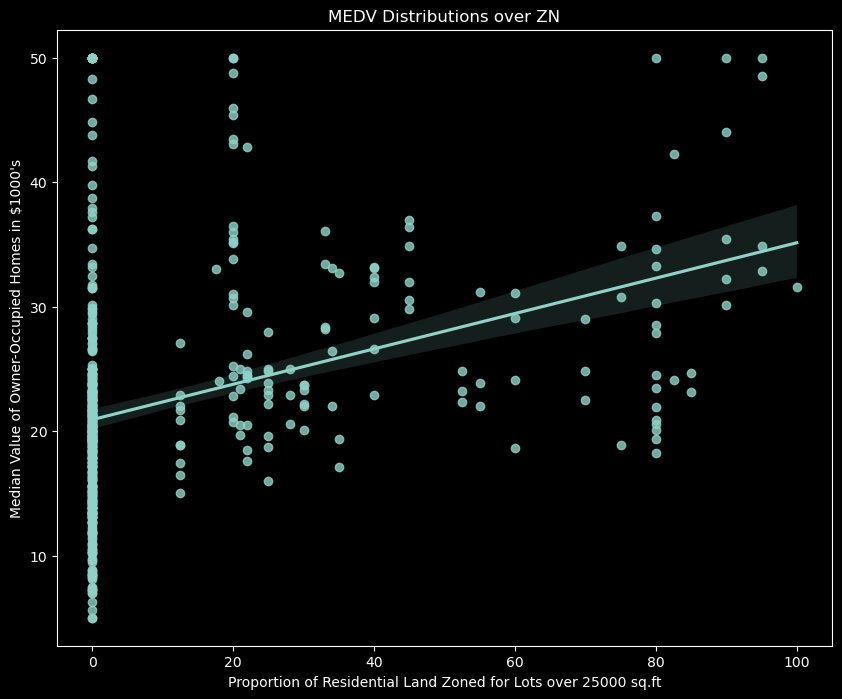

In [51]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['zn'],y=df['medv'])
plt.xlabel("Proportion of Residential Land Zoned for Lots over 25000 sq.ft")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over ZN")
plt.show()

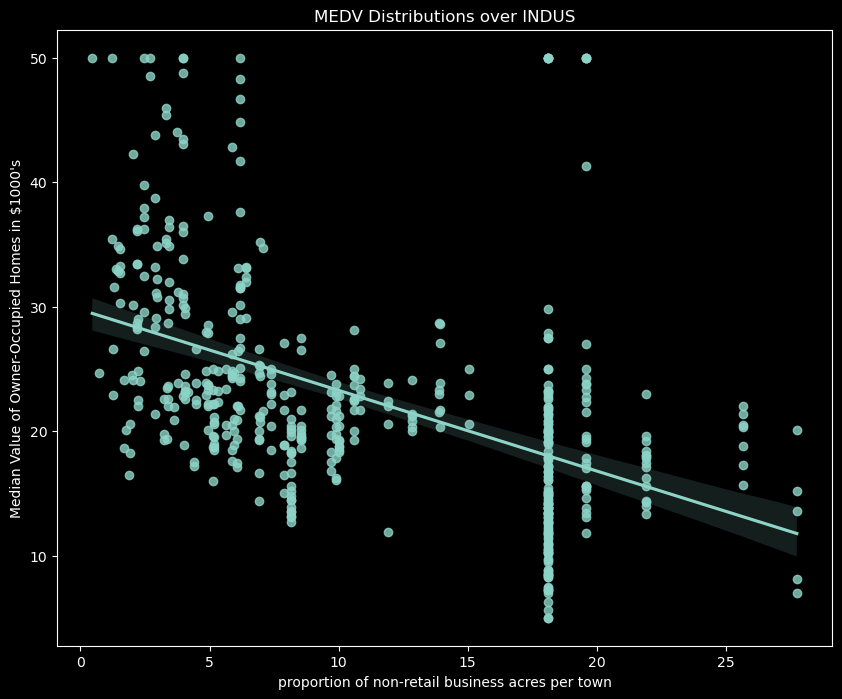

In [52]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['indus'],y=df['medv'])
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over INDUS")
plt.show()

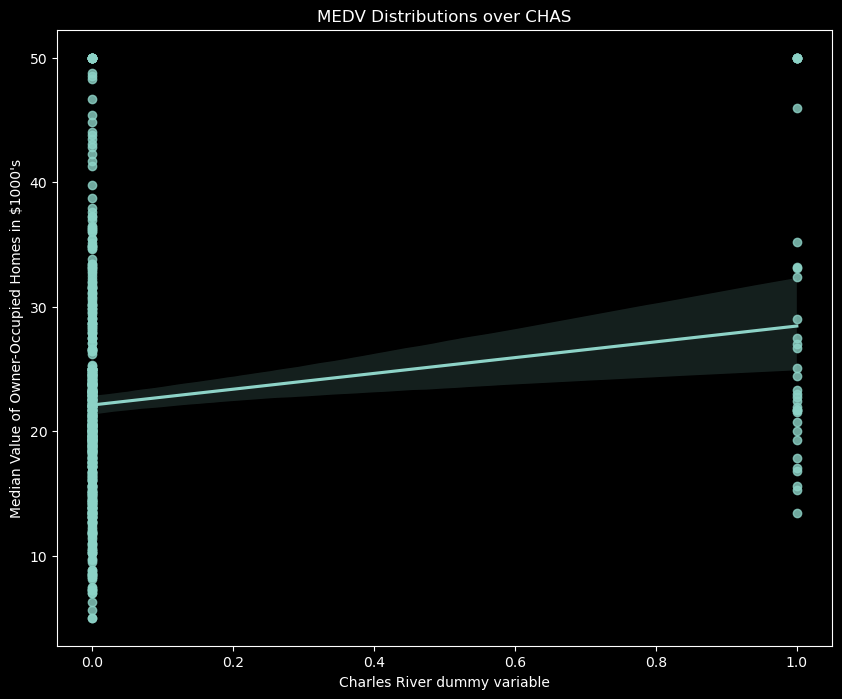

In [53]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['chas'],y=df['medv'])
plt.xlabel("Charles River dummy variable")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over CHAS")
plt.show()

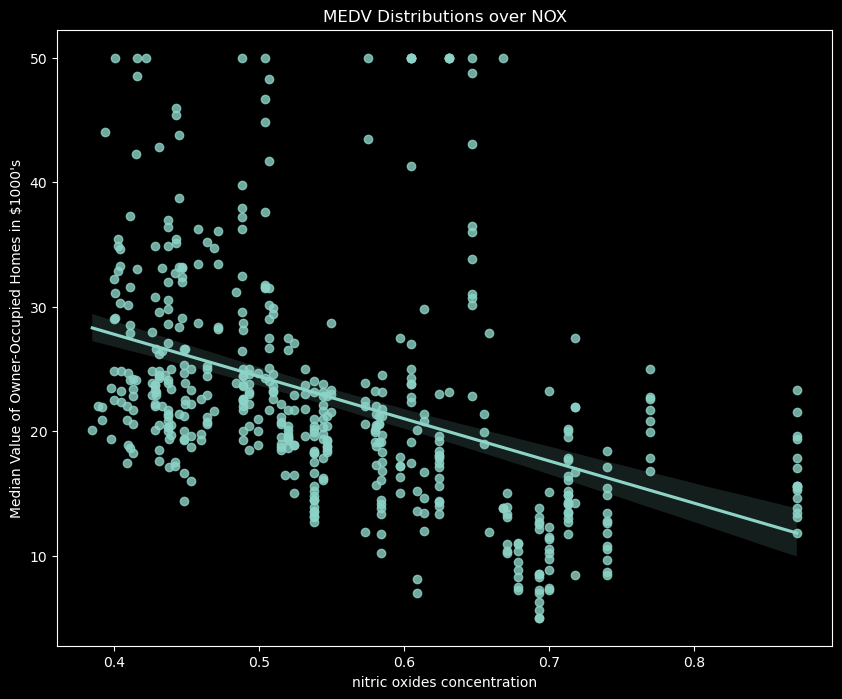

In [54]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['nox'],y=df['medv'])
plt.xlabel("nitric oxides concentration")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over NOX")
plt.show()

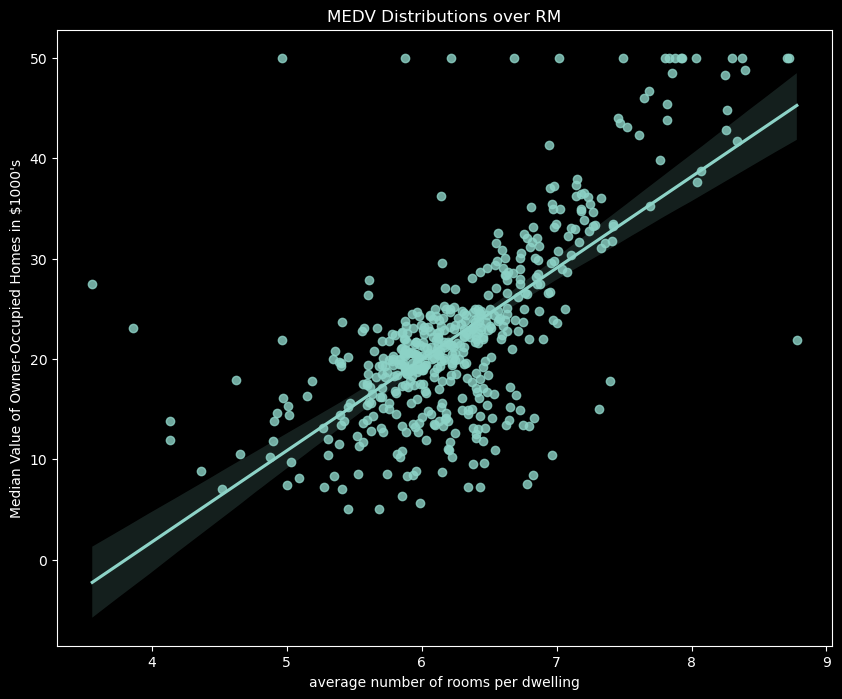

In [55]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['rm'],y=df['medv'])
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over RM")
plt.show()

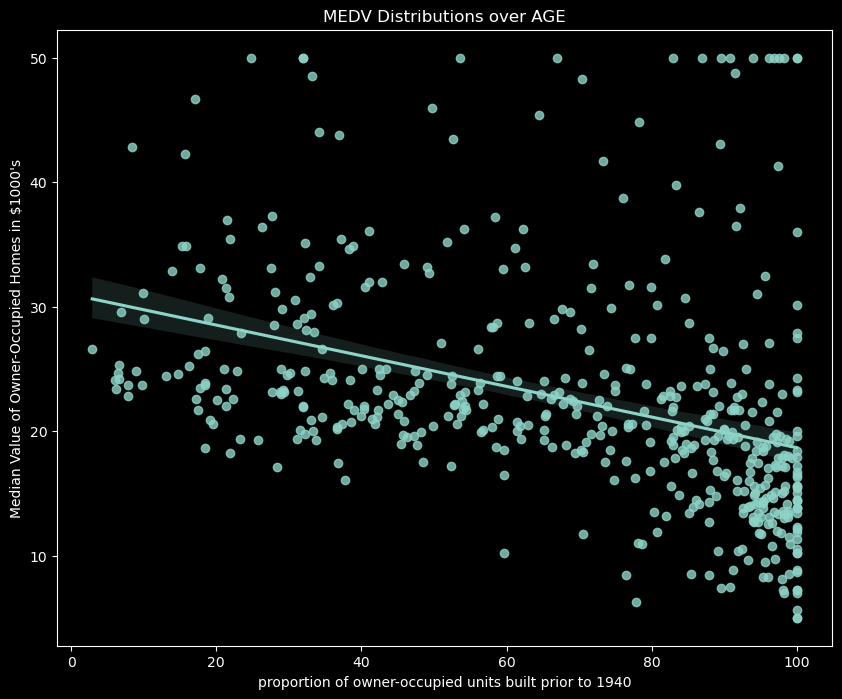

In [56]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['age'],y=df['medv'])
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over AGE")
plt.show()

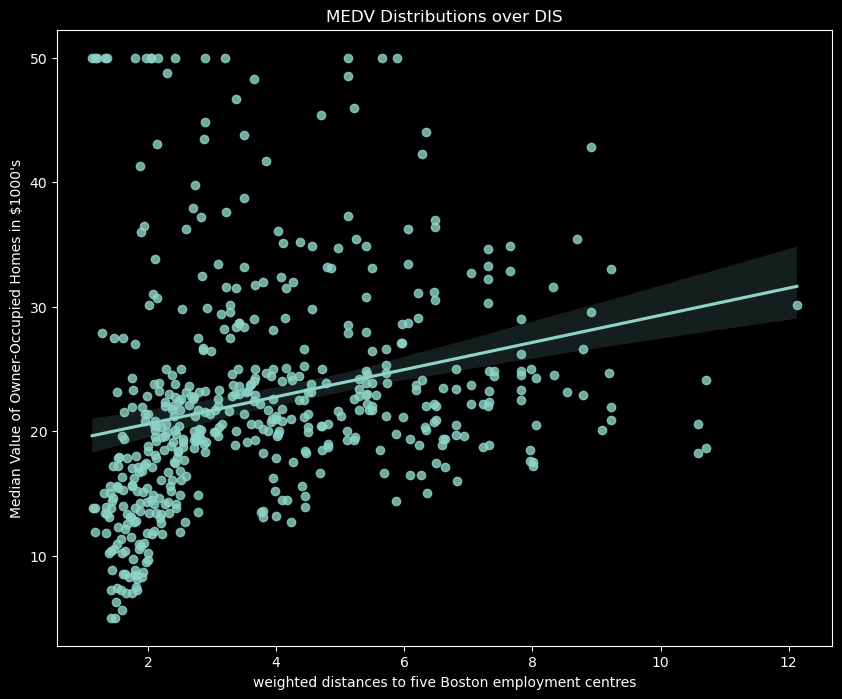

In [57]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['dis'],y=df['medv'])
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over DIS")
plt.show()

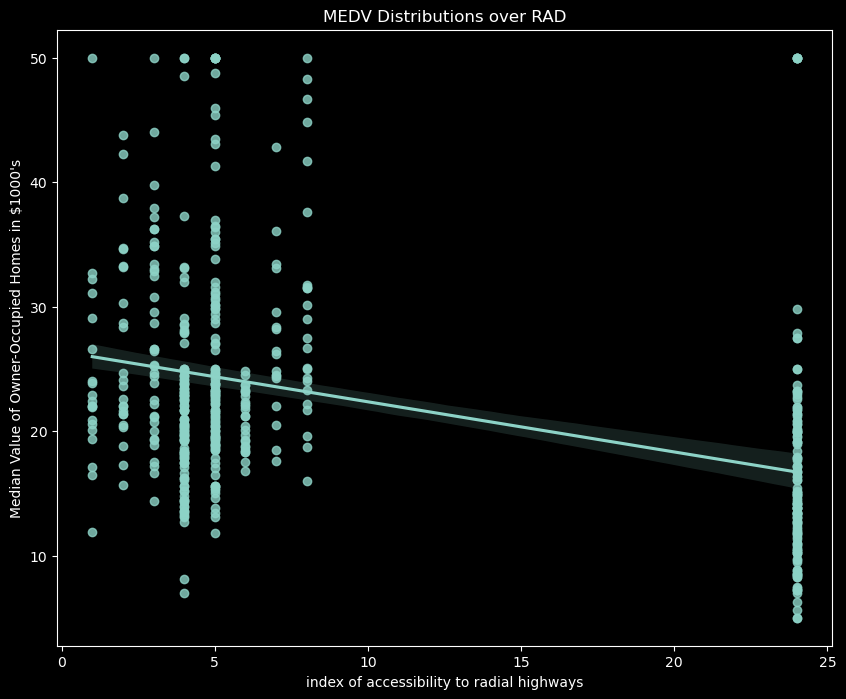

In [58]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['rad'],y=df['medv'])
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over RAD")
plt.show()

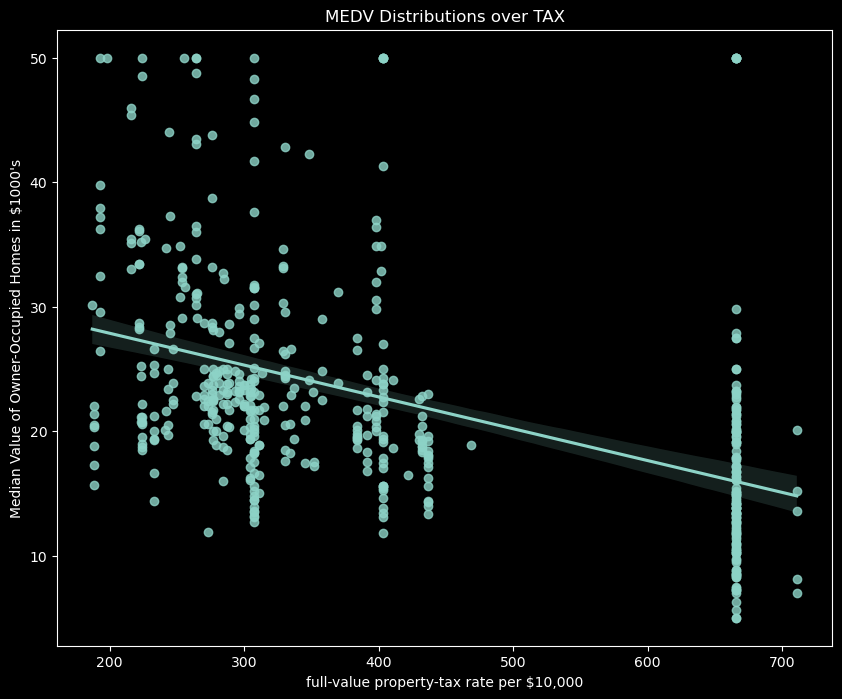

In [59]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['tax'],y=df['medv'])
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over TAX")
plt.show()

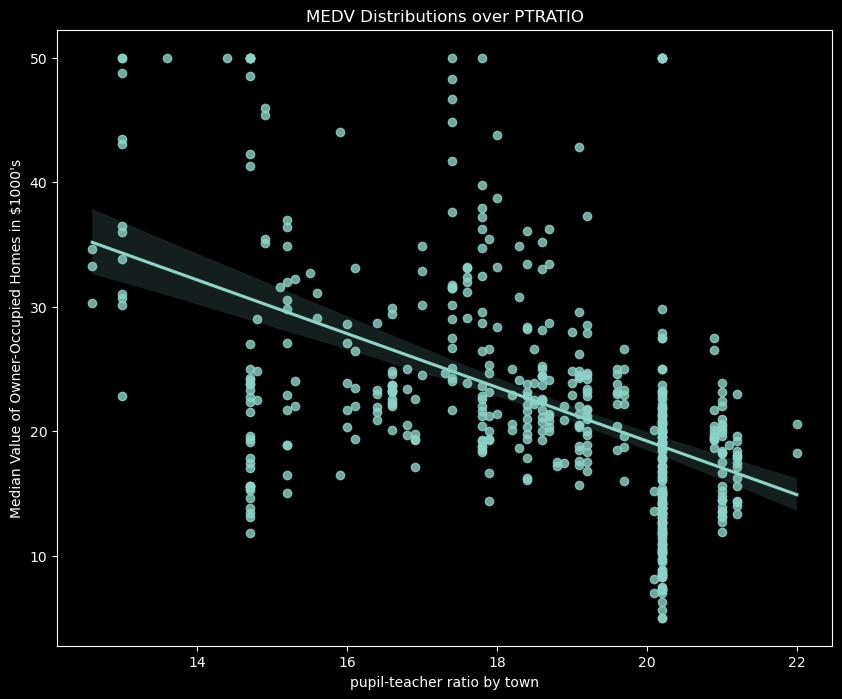

In [60]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['ptratio'],y=df['medv'])
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over PTRATIO")
plt.show()

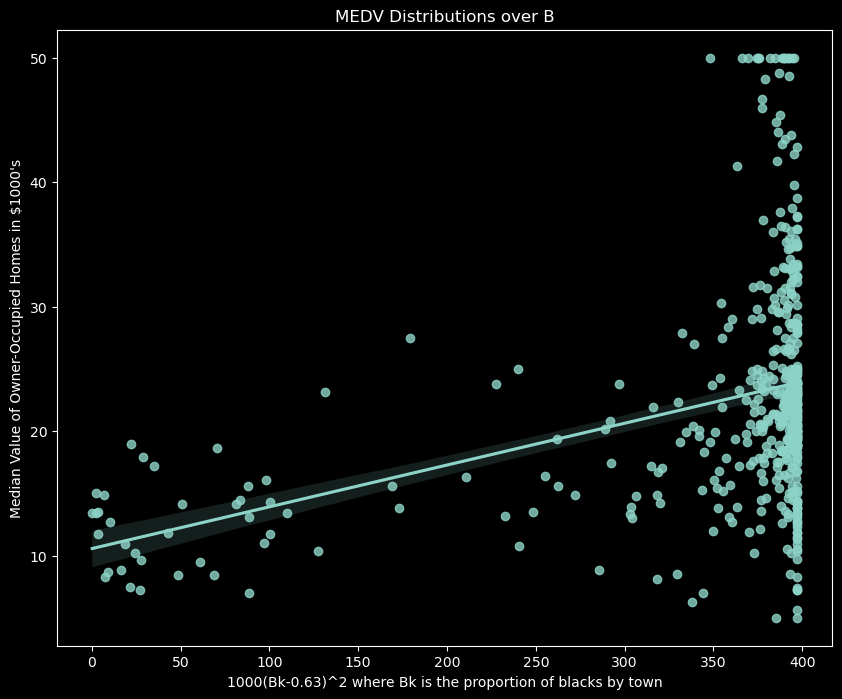

In [61]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['b'],y=df['medv'])
plt.xlabel("1000(Bk-0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over B")
plt.show()

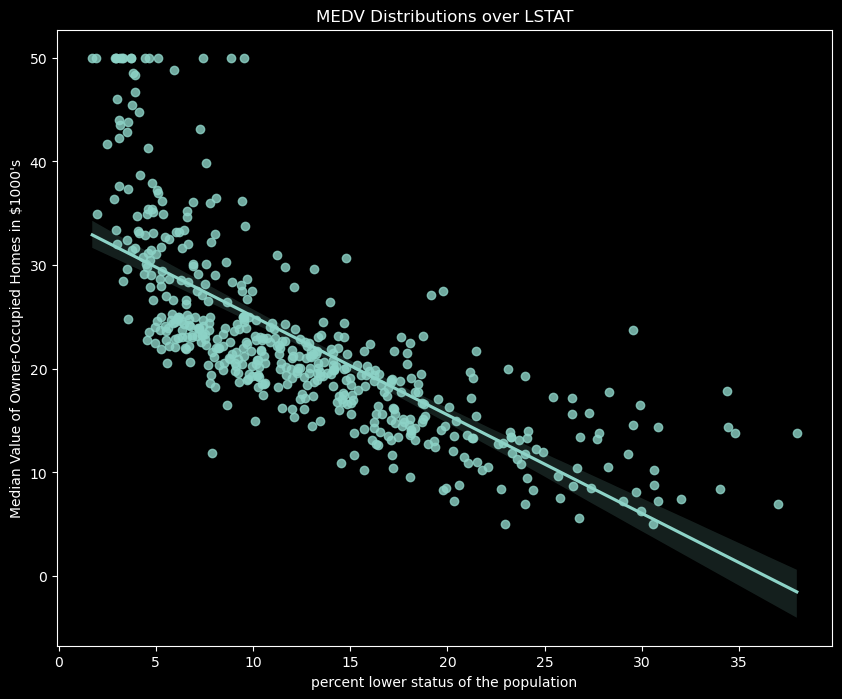

In [62]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['lstat'],y=df['medv'])
plt.xlabel("percent lower status of the population")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over LSTAT")
plt.show()

# Step 3

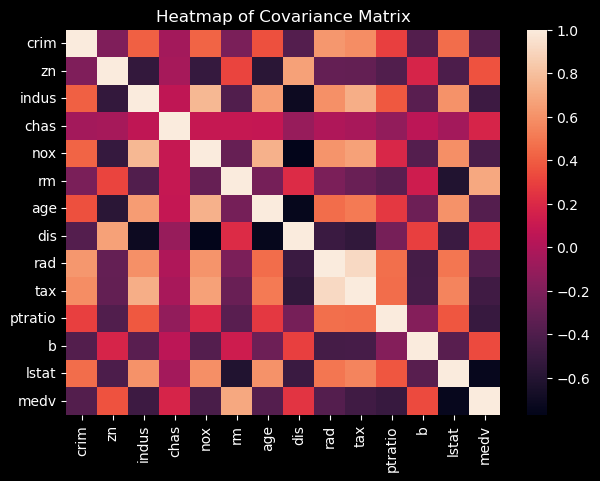

In [63]:
fig = plt.figure(figsize=(7,5))
sns.heatmap(df.corr())
plt.title("Heatmap of Covariance Matrix")
plt.show()

In [64]:
df.corr().abs()[['medv']].sort_values(by='medv')

,medv
chas,0.175260
dis,0.249929
b,0.333461
zn,0.360445
age,0.376955
rad,0.381626
crim,0.388305
nox,0.427321
tax,0.468536
indus,0.483725


<mark> Good Attributes <mark>

Set the threshold to be 0.45 (absolute value of correlation), therefore, the good attributes are 

tax,    indus,    ptratio,    rm,     lstat

# Step 4

In [65]:
from sklearn.preprocessing import MinMaxScaler


In [66]:
columns = ['tax','indus','ptratio','rm','lstat']

In [67]:
def scale(col_name):
    min_max_scaler = MinMaxScaler().fit(df[[col_name]])
    df[[col_name]] = min_max_scaler.transform(df[[col_name]])

In [68]:
for col in columns: 
    scale(col)

In [69]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,0.067815,0,0.538,0.577505,65.2,4.0900,1,0.208015,0.287234,396.90,0.089680,24.0
1,0.02731,0.0,0.242302,0,0.469,0.547998,78.9,4.9671,2,0.104962,0.553191,396.90,0.204470,21.6
2,0.02729,0.0,0.242302,0,0.469,0.694386,61.1,4.9671,2,0.104962,0.553191,392.83,0.063466,34.7
3,0.03237,0.0,0.063050,0,0.458,0.658555,45.8,6.0622,3,0.066794,0.648936,394.63,0.033389,33.4
4,0.06905,0.0,0.063050,0,0.458,0.687105,54.2,6.0622,3,0.066794,0.648936,396.90,0.099338,36.2


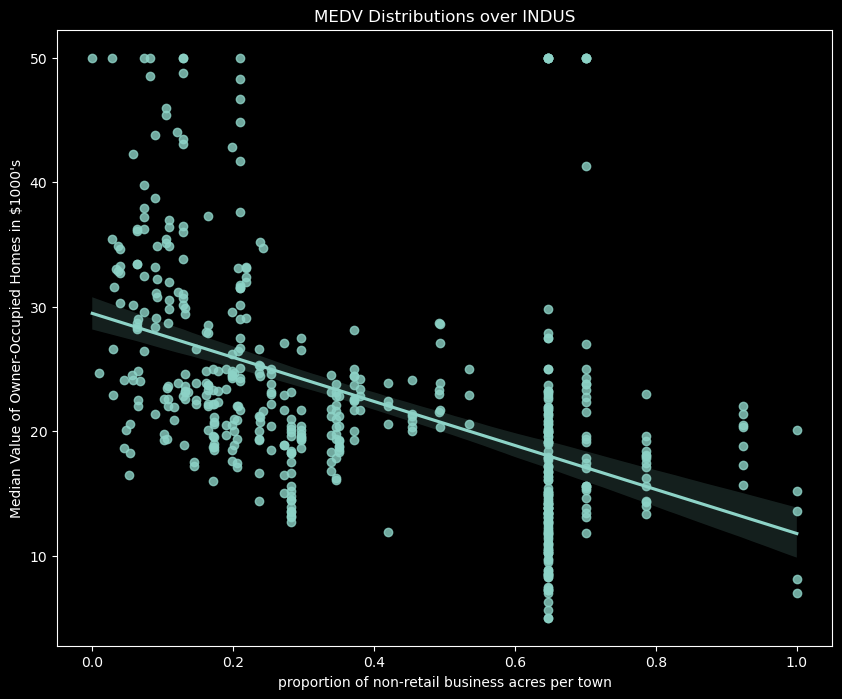

In [70]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['indus'],y=df['medv'],ci=95)
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over INDUS")
plt.show()

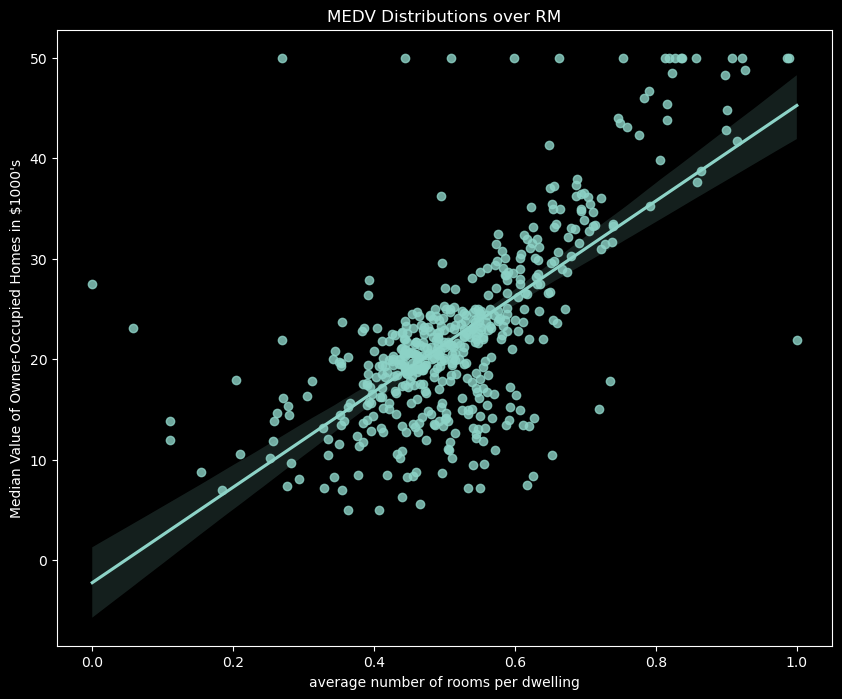

In [71]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['rm'],y=df['medv'],ci=95)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over RM")
plt.show()

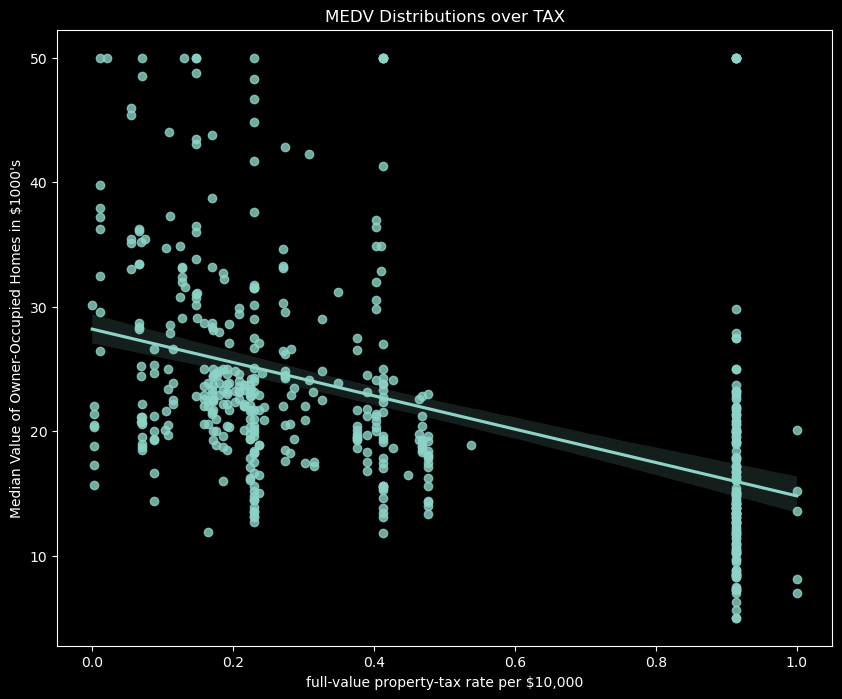

In [72]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['tax'],y=df['medv'],ci=95)
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over TAX")
plt.show()

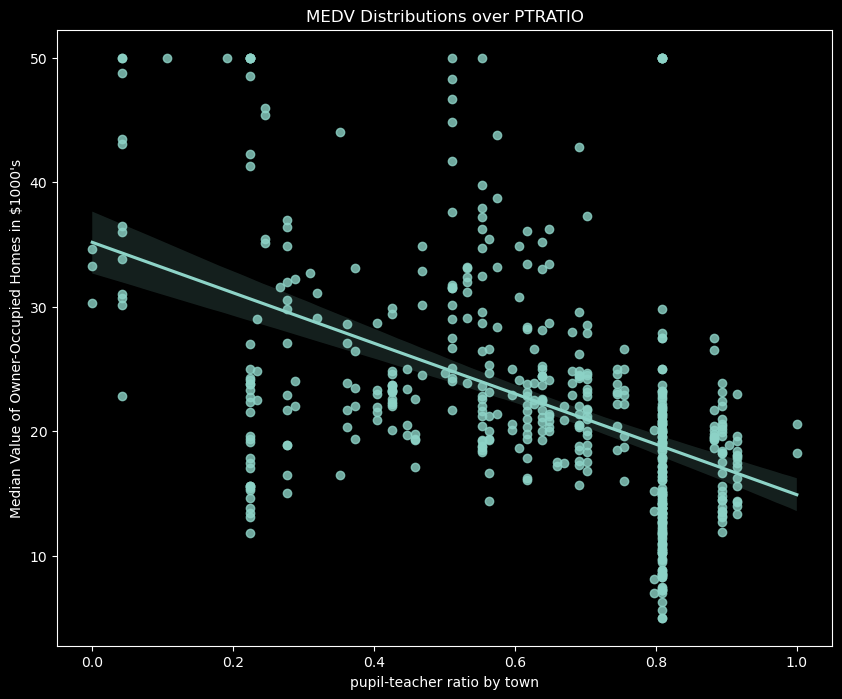

In [73]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['ptratio'],y=df['medv'],ci=95)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over PTRATIO")
plt.show()

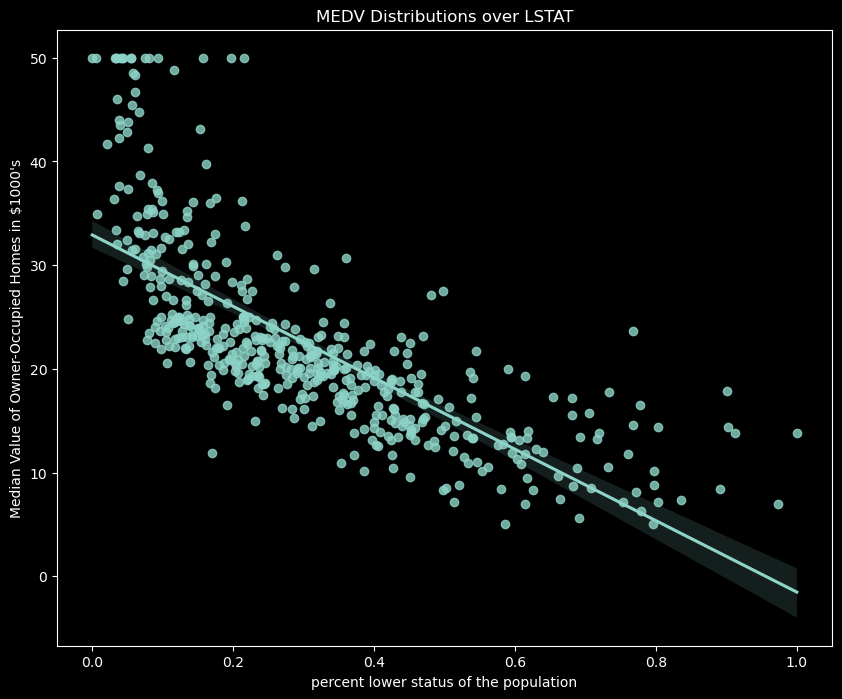

In [74]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df['lstat'],y=df['medv'],ci=95)
plt.xlabel("percent lower status of the population")
plt.ylabel("Median Value of Owner-Occupied Homes in $1000's")
plt.title("MEDV Distributions over LSTAT")
plt.show()

# Step 5

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
y = MinMaxScaler().fit_transform(df[['medv']])
X = df[columns]
X.head()

,tax,indus,ptratio,rm,lstat
0,0.208015,0.067815,0.287234,0.577505,0.089680
1,0.104962,0.242302,0.553191,0.547998,0.204470
2,0.104962,0.242302,0.553191,0.694386,0.063466
3,0.066794,0.063050,0.648936,0.658555,0.033389
4,0.066794,0.063050,0.648936,0.687105,0.099338


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [78]:
def cost(x,y,theta):
    loss = 0
    m = len(y)
    loss = (np.dot(x,theta.T)-y) **2
    loss = loss/(2*m)
    return loss

In [79]:
def grad(X_train,y_train,X_test,y_test,w,step_size,iterations):
    m = len(y_train)
    w = np.random.normal(0.0,1.0,(1,len(X_train[0])))
    b = 0.0
    loss_train = []
    loss_test = []
    for t in range(iterations+1):
        loss = 0
        for i in range(m):
            y_predicted = w.dot(X_train[i]) + b
            loss = loss + (y_train[i]-y_predicted) ** 2
            gw = (y_predicted -y_train[i]) *X_train[i]
            gb = y_predicted-y_train[i]
            w = w-step_size * gw
            b = b-step_size * gb
            
            
        loss_train.append(loss/(2*m))

        loss = 0
        for i in range(len(X_test)):
            y_predicted = w.dot(X_test[i]) + b
            loss += (y_test[i]-y_predicted) ** 2
        loss_test.append(loss/(2*m))
    plt.figure()
    plt.title("plot of RMSE for training set")
    plt.plot(range(len(loss_train)), loss_train, c="yellow", linestyle=":", label="train")
    plt.show()
    plt.figure()
    plt.title("plot of RMSE for testing set")
    plt.plot(range(len(loss_test)), loss_test, c="red", label="test")
    plt.show()

    

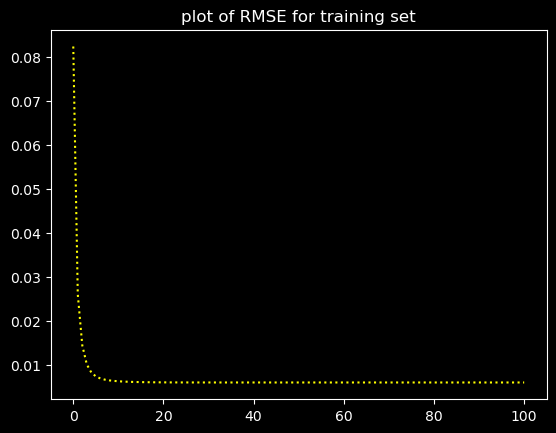

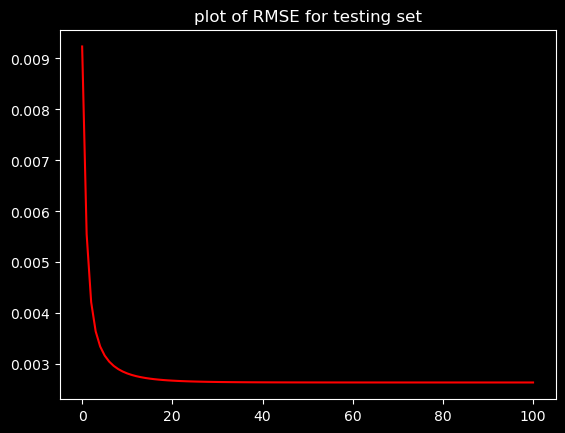

In [80]:
step_size = 0.05
iterations = 100
grad(np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test),0,step_size,iterations)

# Step 6

In [81]:
step_iter = [[0.01, 100],[0.05,100],[0.1,100],[0.5,100],[0.01,1000],[0.05,1000],[0.1,1000],[0.5,1000],[1,100],[1,1000]]

Step size 0.01  and iterations 100


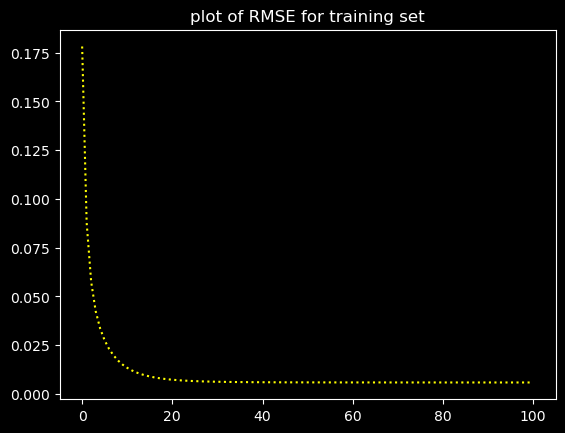

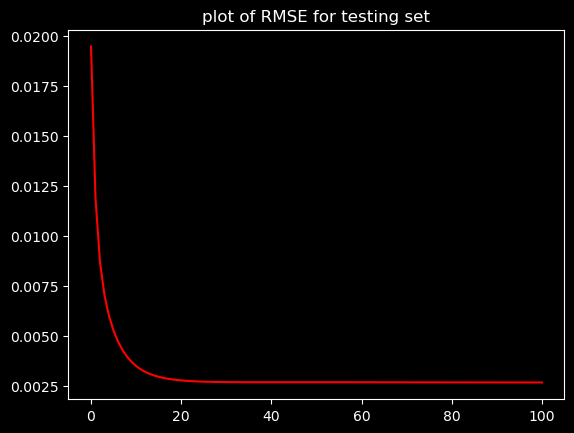

Step size 0.05  and iterations 100


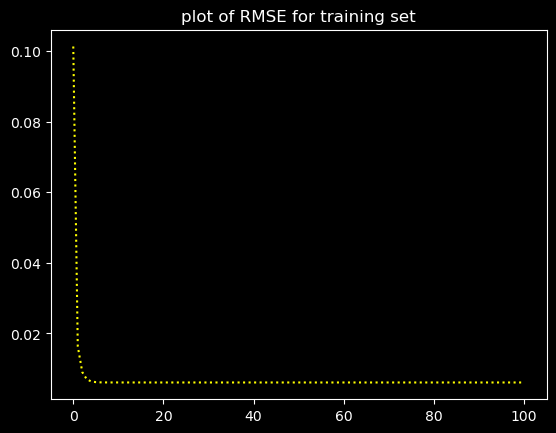

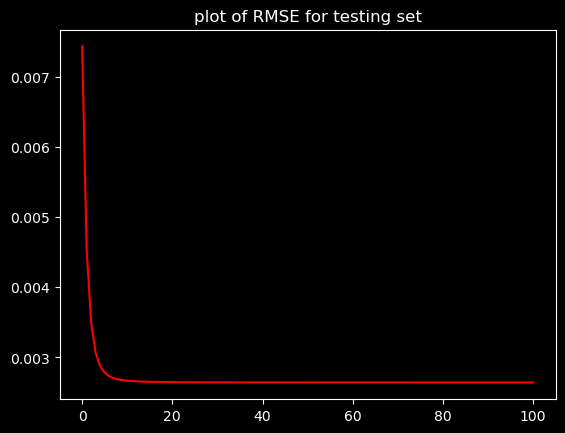

Step size 0.1  and iterations 100


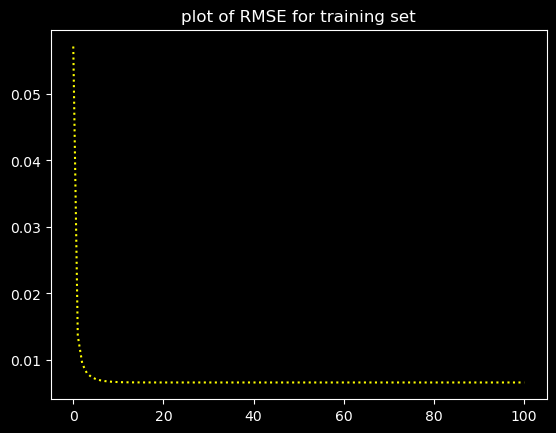

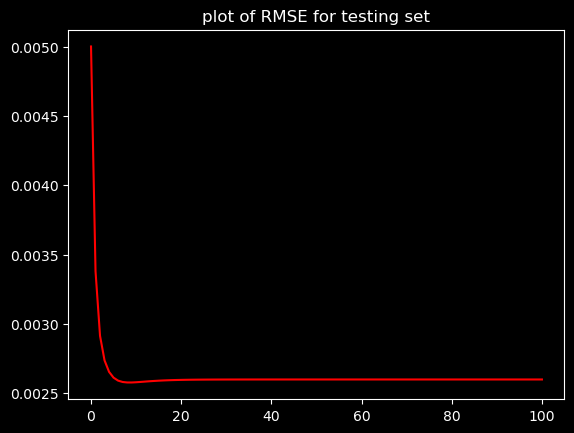

Step size 0.5  and iterations 100


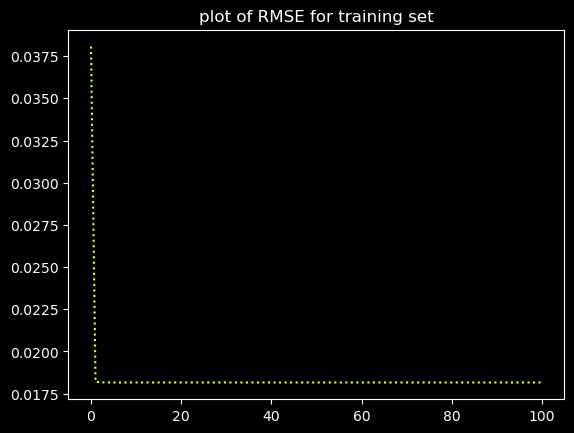

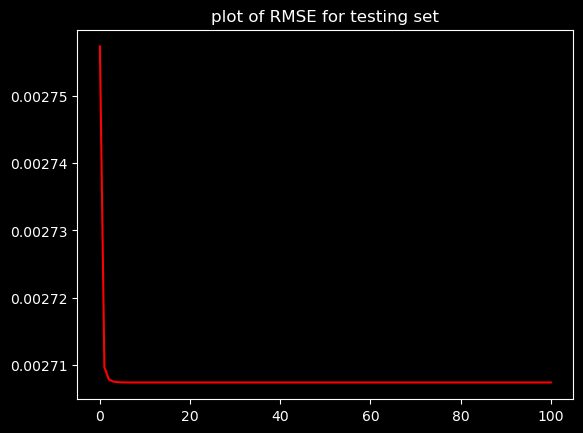

Step size 0.01  and iterations 1000


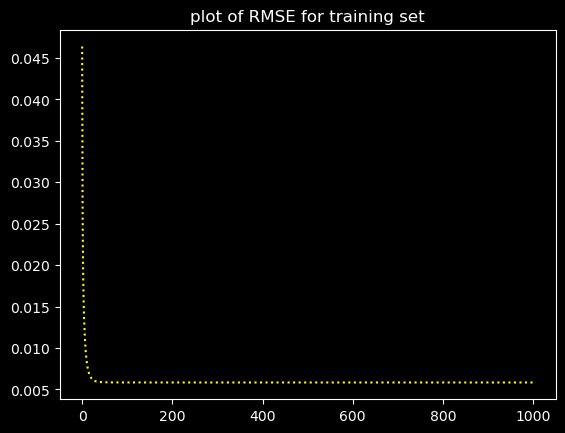

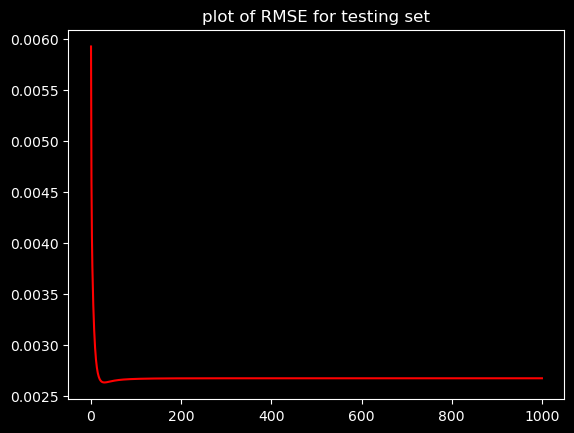

Step size 0.05  and iterations 1000


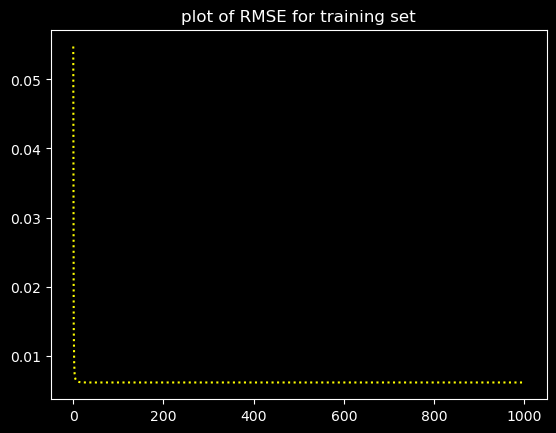

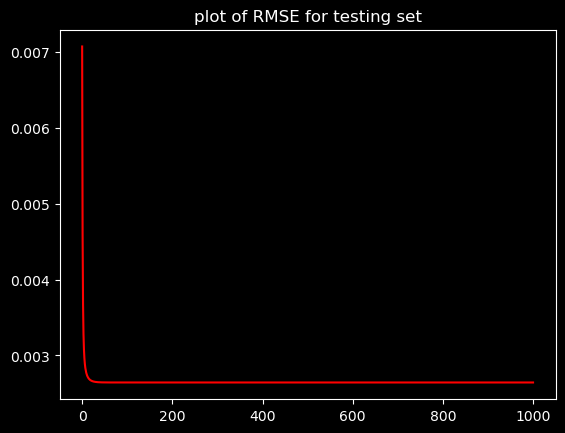

Step size 0.1  and iterations 1000


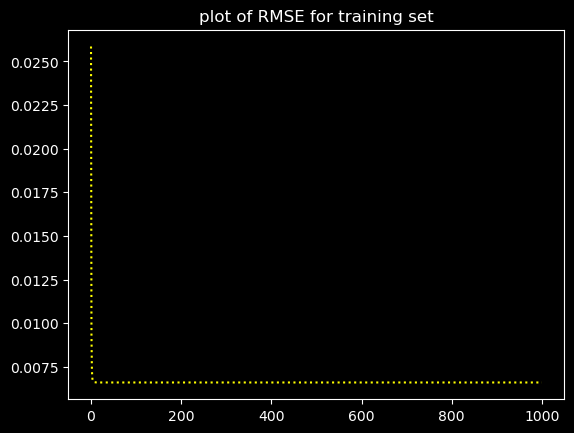

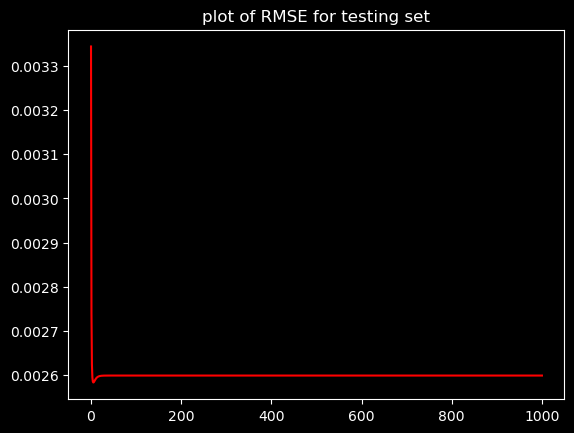

Step size 0.5  and iterations 1000


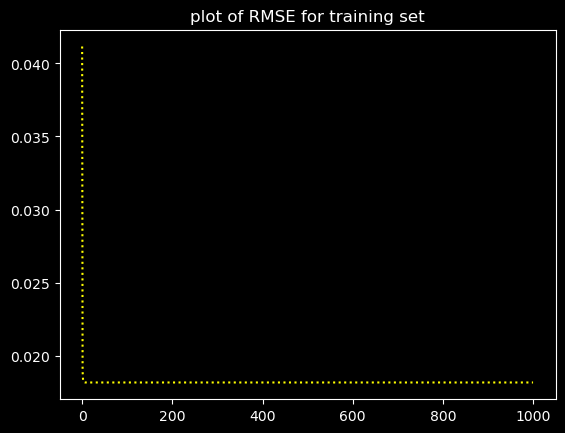

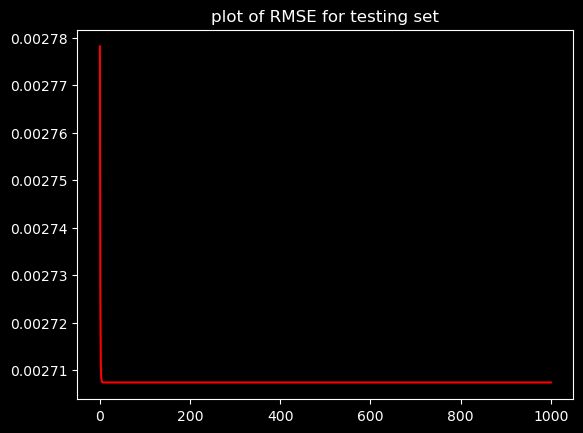

Step size 1  and iterations 100


C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:11: RuntimeWarning: overflow encountered in add
  loss = loss + (y_train[i]-y_predicted) ** 2
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:11: RuntimeWarning: overflow encountered in square
  loss = loss + (y_train[i]-y_predicted) ** 2
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:23: RuntimeWarning: overflow encountered in square
  loss += (y_test[i]-y_predicted) ** 2
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:14: RuntimeWarning: invalid value encountered in subtract
  w = w-step_size * gw
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:15: RuntimeWarning: invalid value encountered in subtract
  b = b-step_size * gb


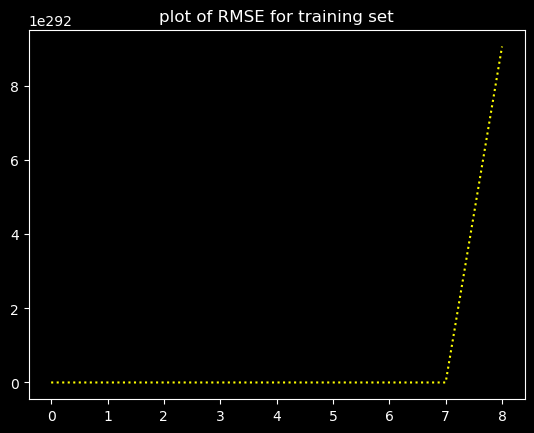

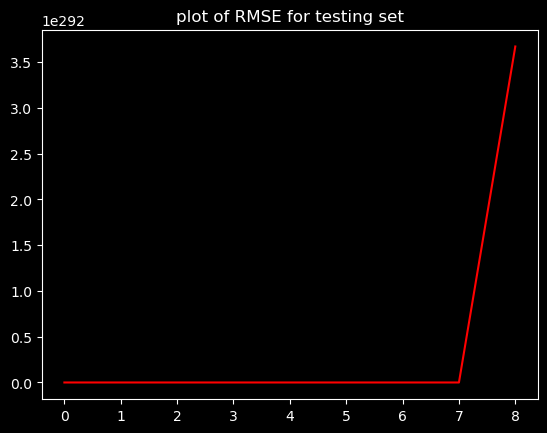

Step size 1  and iterations 1000


C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_20444\1965949745.py:10: RuntimeWarning: overflow encountered in add
  y_predicted = w.dot(X_train[i]) + b


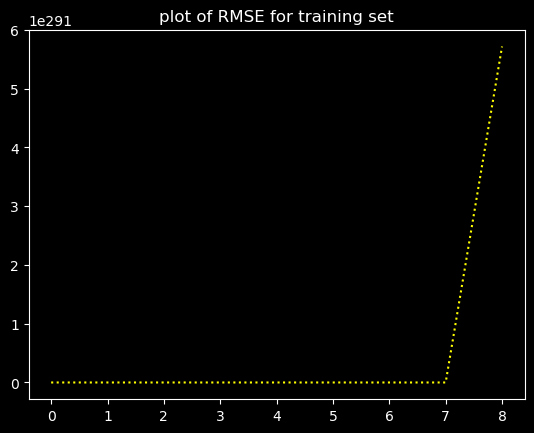

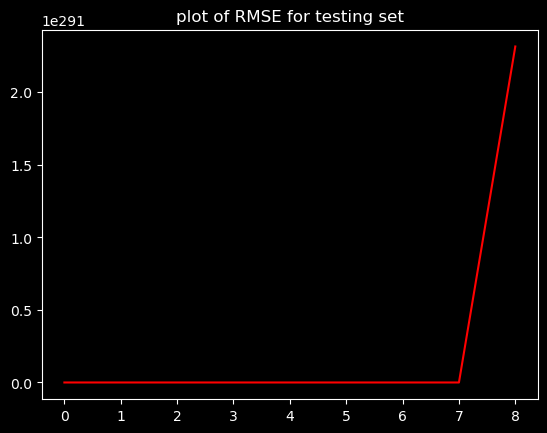

In [82]:
for item in step_iter:
    step_size = item[0]
    iterations = item[1]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    print("Step size",step_size," and iterations", iterations)
    grad(np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test),0,step_size,iterations)